In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import glob
import os
import re
import unicodedata
from collections import deque

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

from funcs.tse import get_ticker_list

In [3]:
def get_ticker_name_list(list_ticker: list) -> dict:
    df = get_ticker_list()
    list_name = list(df[df["コード"].isin(list_ticker)]["銘柄名"])
    dict_name = dict()
    for ticker, name in zip(list_ticker, list_name):
        dict_name[ticker] = name
    return dict_name

In [4]:
pattern_glob = "2025/up_down_ratio_*.html"
pattern_re = re.compile(r"2025/up_down_ratio_[0-9]{2}-[0-9]{2}\.html")

In [5]:
list1 = sorted(glob.glob(pattern_glob))
list2 = deque(maxlen=100)
for file in list1:
    m = pattern_re.match(file)
    if m:
        list2.append(file)
list2

deque(['2025/up_down_ratio_02-25.html',
       '2025/up_down_ratio_02-26.html',
       '2025/up_down_ratio_02-27.html',
       '2025/up_down_ratio_02-28.html',
       '2025/up_down_ratio_03-03.html',
       '2025/up_down_ratio_03-04.html',
       '2025/up_down_ratio_03-05.html',
       '2025/up_down_ratio_03-06.html',
       '2025/up_down_ratio_03-07.html',
       '2025/up_down_ratio_03-10.html',
       '2025/up_down_ratio_03-11.html',
       '2025/up_down_ratio_03-12.html',
       '2025/up_down_ratio_03-13.html',
       '2025/up_down_ratio_03-14.html',
       '2025/up_down_ratio_03-17.html',
       '2025/up_down_ratio_03-18.html',
       '2025/up_down_ratio_03-19.html',
       '2025/up_down_ratio_03-21.html',
       '2025/up_down_ratio_03-24.html',
       '2025/up_down_ratio_03-25.html',
       '2025/up_down_ratio_03-26.html',
       '2025/up_down_ratio_03-27.html',
       '2025/up_down_ratio_03-28.html',
       '2025/up_down_ratio_03-31.html',
       '2025/up_down_ratio_04-01.html',


In [6]:
dict_ranking = dict()
for file in list2:
    df_table = pd.read_html(file, encoding="utf8")[0]
    for code in df_table["コード"]:
        if code in dict_ranking.keys():
            dict_ranking[code] += 1
        else:
            dict_ranking[code] = 1
df = pd.DataFrame({
    "code": dict_ranking.keys(),
    "name": None,
    "freq": dict_ranking.values()
})
df_ranking = df.sort_values('freq', ascending=False, ignore_index=True)[:10]
df_ranking

,code,name,freq
0,290A,None,74
1,3823,None,72
2,218A,None,70
3,3350,None,70
4,4592,None,68
5,5246,None,58
6,4584,None,58
7,4593,None,57
8,3825,None,56
9,4889,None,56


In [7]:
dict_name = get_ticker_name_list(list(df_ranking["code"]))
for i, code in enumerate(df_ranking["code"]):
    if f"{code}" in dict_name.keys():
        df_ranking.at[i, "name"] = unicodedata.normalize('NFKC', dict_name[code])
df_ranking

,code,name,freq
0,290A,Liberaware,74
1,3823,Synspective,72
2,218A,メタプラネット,70
3,3350,THE WHY HOW DO COMPANY,70
4,4592,リミックスポイント,68
5,5246,キッズウェル・バイオ,58
6,4584,サンバイオ,58
7,4593,ヘリオス,57
8,3825,レナサイエンス,56
9,4889,ELEMENTS,56


In [12]:
df_ranking.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>code</th>\n      <th>name</th>\n      <th>freq</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>290A</td>\n      <td>Liberaware</td>\n      <td>74</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>3823</td>\n      <td>Synspective</td>\n      <td>72</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>218A</td>\n      <td>メタプラネット</td>\n      <td>70</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>3350</td>\n      <td>THE WHY HOW DO COMPANY</td>\n      <td>70</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>4592</td>\n      <td>リミックスポイント</td>\n      <td>68</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>5246</td>\n      <td>キッズウェル・バイオ</td>\n      <td>58</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>4584</td>\n      <td>サンバイオ</td>\n      <td>58</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>4593</td>\n    

ranking/2025/0718_1_290A_volatility.png


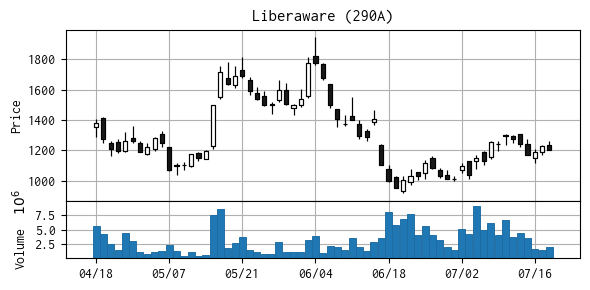

ranking/2025/0718_2_3823_volatility.png


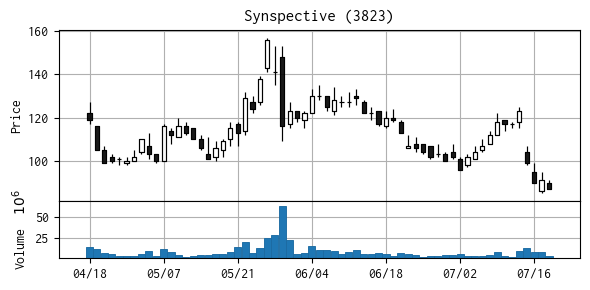

ranking/2025/0718_3_218A_volatility.png


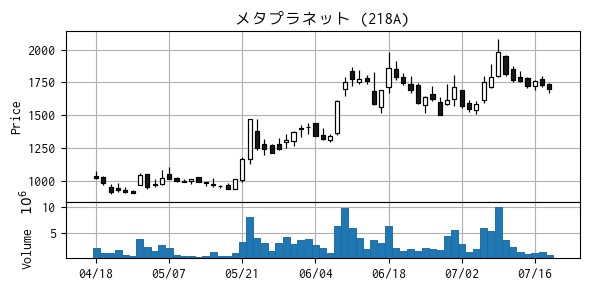

ranking/2025/0718_4_3350_volatility.png


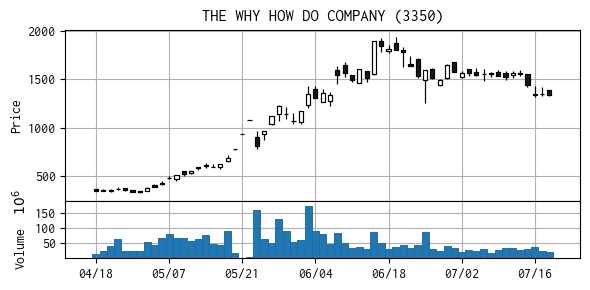

ranking/2025/0718_5_4592_volatility.png


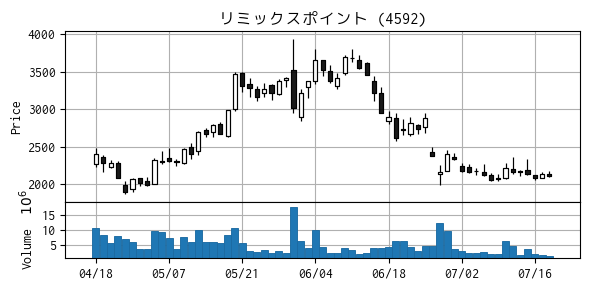

ranking/2025/0718_6_5246_volatility.png


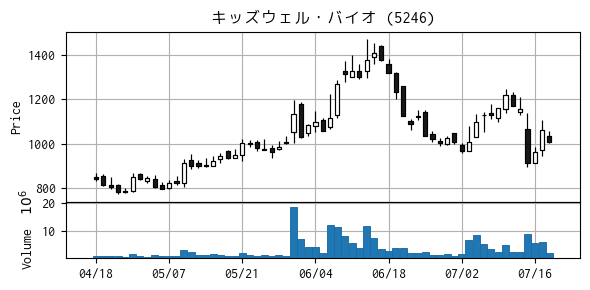

ranking/2025/0718_7_4584_volatility.png


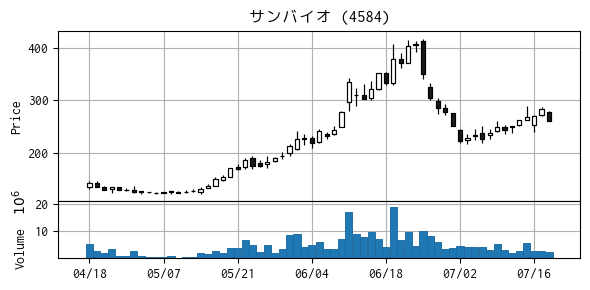

ranking/2025/0718_8_4593_volatility.png


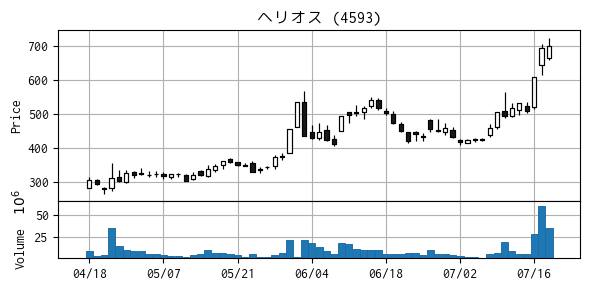

ranking/2025/0718_9_3825_volatility.png


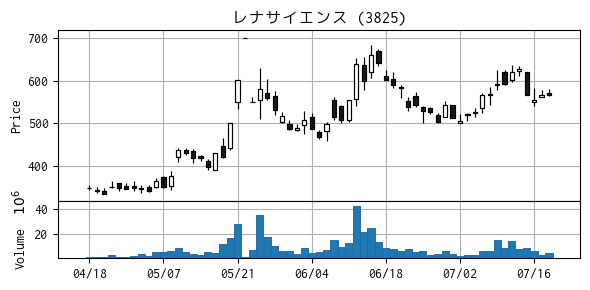

ranking/2025/0718_10_4889_volatility.png


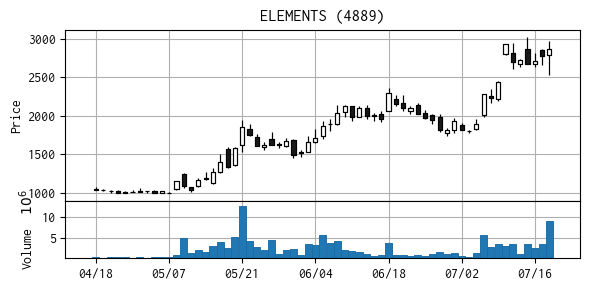

In [10]:
for ranking, code in enumerate(df_ranking["code"]):
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df = ticker.history(period="3mo", interval="1d")
    
    FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
    fm.fontManager.addfont(FONT_PATH)
    
    # FontPropertiesオブジェクト生成（名前の取得のため）
    font_prop = fm.FontProperties(fname=FONT_PATH)
    font_prop.get_name()
    
    plt.rcParams["font.family"] = font_prop.get_name()
    plt.rcParams["font.size"] = 10
    fig = plt.figure(figsize=(6, 3))
    ax = dict()
    n = 2
    gs = fig.add_gridspec(
        n, 1, wspace=0.0, hspace=0.0, height_ratios=[3 if i == 0 else 1 for i in range(n)]
    )
    for i, axis in enumerate(gs.subplots(sharex="col")):
        ax[i] = axis
        ax[i].grid()
    
    mpf.plot(df, type="candle", style="default", volume=ax[1], datetime_format="%m/%d", xrotation=0, ax=ax[0])
    
    #dict_name = get_ticker_name_list([code])
    if code in dict_name.keys():
        name = unicodedata.normalize('NFKC', dict_name[code])
    elif "longName" in ticker.info.keys():
        name = ticker.info["longName"]
    elif "shortName" in ticker.info.keys():
        name = ticker.info["shortName"]
    else:
        name = ""
    
    ax[0].set_title(f"{name} ({code})")
    
    plt.tight_layout()
    dt = df.tail(1).index[0]
    name_chart = f"ranking/{dt.year:04d}/{dt.month:02d}{dt.day:02d}_{ranking + 1}_{code}_volatility.png"
    print(name_chart)
    plt.savefig(name_chart)
    plt.show()
    plt.close()